# BANKING PROJECT: To Predict whether the client will subscribe to a term deposit

# Problem Statement

### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Data Science Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.



# Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not 0 ('no') subscribed.

The Data set has **41,188 instances and 20 features (input variables), and 1 target variable (y)**.
The data set can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Following is the description of the features of our data set:

**Features**

|Feature|Description|
|-----|-----|
|age|age of a person|  
|job |type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|has credit in default? ('no','yes','unknown')|  
|housing|has housing loan? ('no','yes','unknown')|  
|loan|has personal loan? ('no','yes','unknown')|  
|contact|contact communication type ('cellular','telephone')|  
|month|last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous| number of contacts performed before this campaign and for this client|  
|poutcome|outcome of the previous marketing campaign ('failure','nonexistent','success')|  
|emp.var.rate|employment variation rate - quarterly indicator|  
|cons.price.idx|consumer price index - monthly indicator|  
|cons.conf.idx|consumer confidence index - monthly indicator|  
|euribor3m|euribor 3 month rate - daily indicator|
|nr.employed|number of employees - quarterly indicator|   

**Target variable (desired output):**  

|Feature|Description|
|-----|-----|
|y |has the client subscribed a term deposit? ('yes','no')|

## Importing the necessary libraries


In [1]:
#for numerical computing and data analysis and manipulation
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for filtering the warnings
import warnings
warnings.filterwarnings('ignore')

# for statistical computing
from scipy.stats.mstats import winsorize

# Machine learning models for data modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

## Loading the dataset

In [2]:
# loading the dataset into a pandas dataframe
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

#viewing the first few rows of the dataframe
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# number of rows and columns of the dataframe
print('Shape of the data is: ',data.shape)

Shape of the data is:  (41188, 21)


## Cleaning the Dataframe

Let us check if the dataframe contains any null values and duplicates.

In [4]:
# checking for number of null values in each column
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# checking for number of duplicated values 
data.duplicated().sum()

12

There are no null values but the dataframe contains 12 duplicate values. We will drop the duplicates since they are very few as compared to the total instances we have.

In [6]:
# dropping duplicates
data.drop_duplicates(inplace=True)

In [7]:
# rechecking the shape of the dataframe after dropping duplicates
data.shape

(41176, 21)

# Exploratory Data Analysis

**We now take a look at the basic information of the features of our dataframe**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## Checking for inconsistencies
Now that we have obtained the lists of numerical and categorical features of our data set, let's take a look at the first few rows and last few rows of the data to check for any inconsistencies.

In [9]:
# first 15 rows of the data set
data.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# last 15 rows of the data set
data.tail(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,329,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,180,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41176,38,housemaid,divorced,high.school,no,yes,yes,cellular,nov,thu,360,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no
41177,57,retired,married,professional.course,no,yes,no,cellular,nov,thu,124,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no


Looking the few rows, we can see that there are no obvious inconsistencies in the data. There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


## Categorical and Numerical Features
Let's create a list of all the categorical columns and numerical columns. Looking at the dataset and info, we think we can identify the categorical and continuous columns in it. But it might also be possible that the numerical values are represented as strings in some feature, or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the features.

In [11]:
# IDENTIFYING NUMERICAL FEATURES
numerical_col = data.select_dtypes(include=np.number).columns.tolist() # selects data with numeric features
                                                                         
print("Numerical Features:")
print(numerical_col)
print("===="*30)



# IDENTIFYING CATEGORICAL FEATURES
categorical_col = data.select_dtypes(exclude=np.number).columns.tolist() # excludes data with numeric features
                                                                
print("Categorical Features:")
print(categorical_col)
print("===="*30)



Numerical Features:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Now we move forward towards visually exploring the data and understanding the numerical and categorical features better through exploratory data analysis.

## Univariate analysis of Categorical data

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.
If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.


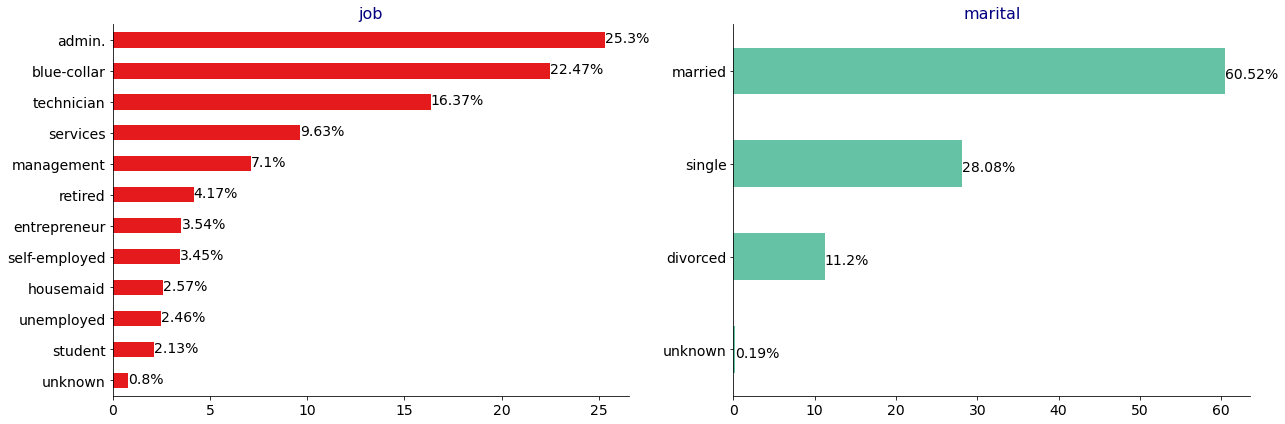

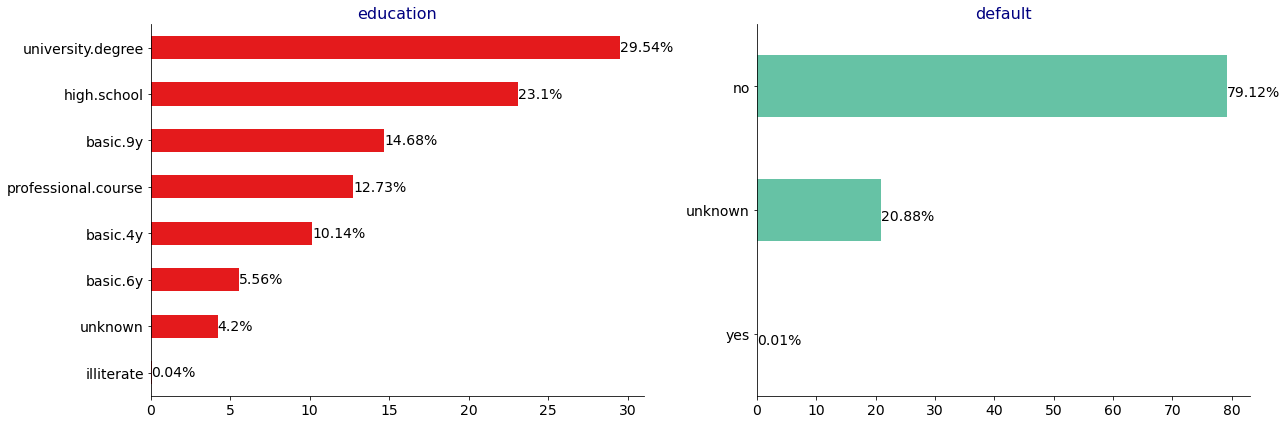

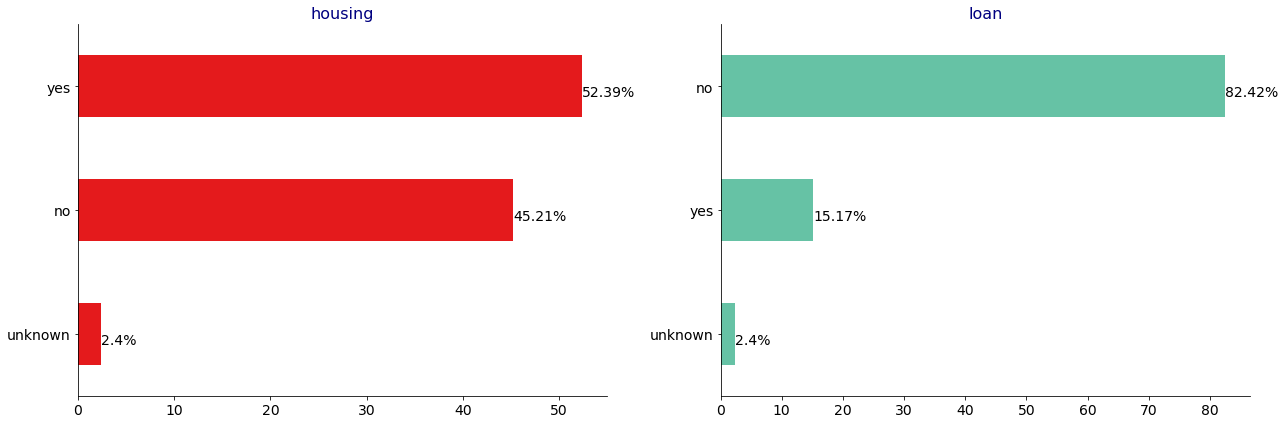

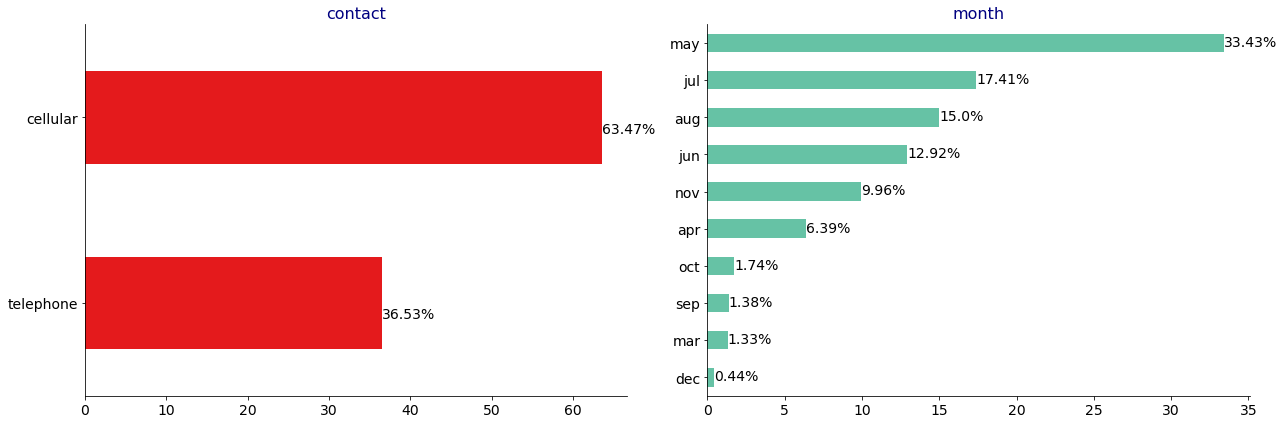

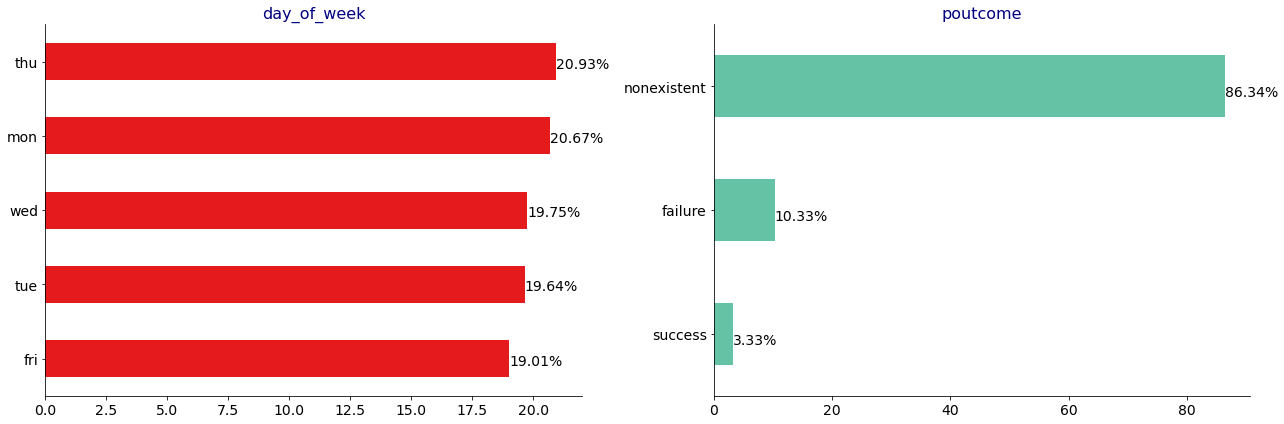

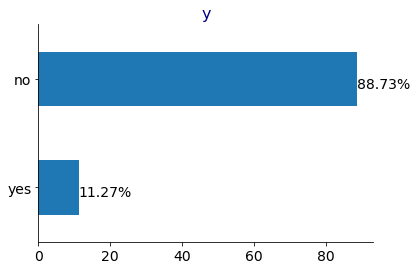

In [12]:
# creating bar plots for analysis categorical data

for i in range(0,len(categorical_col),2):  # taking steps of 2 to get adjacent plots
        if len(categorical_col) > i+1:   
                
                plt.figure(figsize=(18,6))  # initializing the figure
                
                plt.subplot(121)    # creating the first subplot
                sns.despine()       # removing the right and top boundary lines (spines) of figures
                
                s = ((data[categorical_col[i]]            # choosing the ith categorical variable
                      .value_counts(normalize=True)*100)  # relative frequencies of each category in %
                      .sort_values()                      # sorting values in descending order
                      .plot(kind='barh', cmap='Set1')     # creating a horizontal bar plot on the sorted data
                    )
                
                for rect in s.patches:    # this for loop creates annotations of the value for each bar in the plot
                    
                    plt.text(rect.get_width(), # x co-ordinate to place the text
                             rect.get_y() + rect.get_height()/3., # y co-ordinate to place the text
                             str(round(rect.get_width(),2))+'%', # the text to be displayed
                             fontsize=14 )
                    
                plt.xticks(size=14)
                plt.yticks(size=14)     
                plt.title(categorical_col[i],color='navy', fontsize=16)  # setting the title for the plot
                
                
                # the code below functions in the same way as above and creates adjacent plots
                plt.subplot(122)     
                sns.despine()
                
                t = ((data[categorical_col[i+1]]
                      .value_counts(normalize=True)*100)
                      .sort_values()
                      .plot(kind='barh', cmap='Set2')
                    )
                
                for rect in t.patches:
                    plt.text(rect.get_width(), 
                             rect.get_y() + rect.get_height()/3., 
                             str(round(rect.get_width(),2))+'%', 
                              fontsize=14 )
                    
                plt.xticks(size=14)
                plt.yticks(size=14)     
                plt.title(categorical_col[i+1], color='navy', fontsize=16)
                
                plt.tight_layout()
                plt.show()   # displays the figure and clears the residue text

                
        # creating a similar plot for the last categorical variable (the target variable)
        else:
                t = ((data[categorical_col[i]]
                      .value_counts(normalize=True)*100)
                      .sort_values()
                      .plot(kind='barh')
                    )
                sns.despine()
                
                for rect in t.patches:
                    plt.text(rect.get_width(), rect.get_y() + rect.get_height()/3., str(round(rect.get_width(),2))+'%', 
                              fontsize=14)
                plt.xticks(size=14)
                plt.yticks(size=14)     
                plt.title(categorical_col[i], color='navy', fontsize=16)
        

### INSIGHTS :

From the above visuals, we can make the following observations: 
- **JOB:** Over 63% of all types of jobs in our dataset belong to just 3 categories — **admin, blue-collar and technician**, which are the top three job categories. The limited number of the types of jobs may limit the predictive power of this variable. 
- **MARITAL:** A huge number of the customers are married. If we combined the single and divorced categories into a single 'unmarried' category then there will be a good balance between the two categories of this class.
- **EDUCATION:** More than 50% of targeted individuals have a university degree or a high school diploma. There is a relatively small number of respondents with an unknown education level, as well as illiterate ones.
- **DEFAULT:** Majority of the customers do not have a credit in default
- **HOUSING:** This class is almost evenly split. There is a difference of only about 9% in between the number of people who have a housing loan and those who dont, with the former class being a majority. 
- **PERSONAL:** Very few of the customers have personal loans.
- **CONTACT:** Cell-phones seem to be the most favoured method of reaching out to customers.
- **MONTH:** Most of the respondents were contacted during the summer months, with more than 30% of all contacts happening in the month of **May**. There is no record of contacts made during January and February.
- **DAY_OF_WEEK:** There aren't any useful insights that can be drawn from this feature since day of the last contact is distributed almost uniformly across the days of the week. There is no record for contacts made during the weekend (saturday and sunday).
- **POUTCOME:** More than 86% of respondents were never covered by previous marketing campaigns.
- **Y:** The plot for the target variable shows **heavy imbalance in the target variable**. 


- There are some sparse or similar classes, which can be combined into a single category to simplify the prediction models, which we will do later.
- The missing values in some columns have been represented as `unknown`. The value `unknown` represents missing data which needs to be treated.

### Imputing `unknown` values of categorical columns 

We have seen some categorical variables have a value called `unknown`. `unknown` values are a kind of missing data.
Here we shall impute the unkown values with the mode of that feature/column.

In [13]:
# Imputing the unknown or missing values of categorical data with mode

for col in categorical_col:
        data[col]=data[col].str.replace('unknown', data[col].mode()[0])
data.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Bivariate Analysis of Categorical features

Bivariate analysis involves checking the relationship between two variables simultaneously. Let's plot every categorical feature against the target by plotting a barchart. 

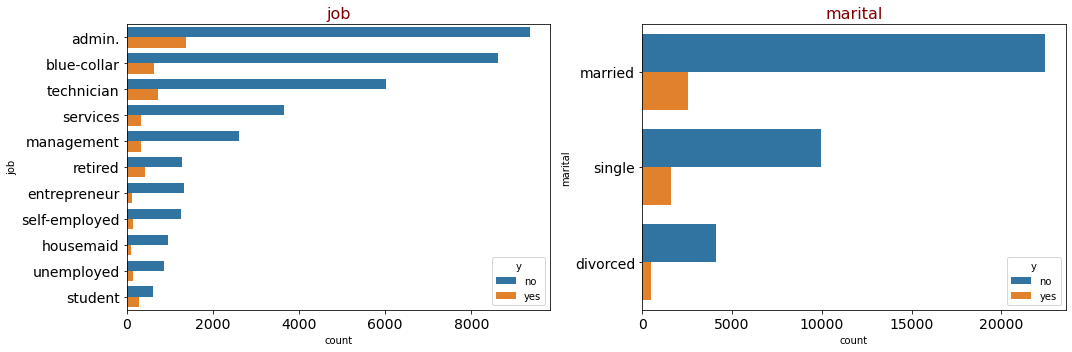

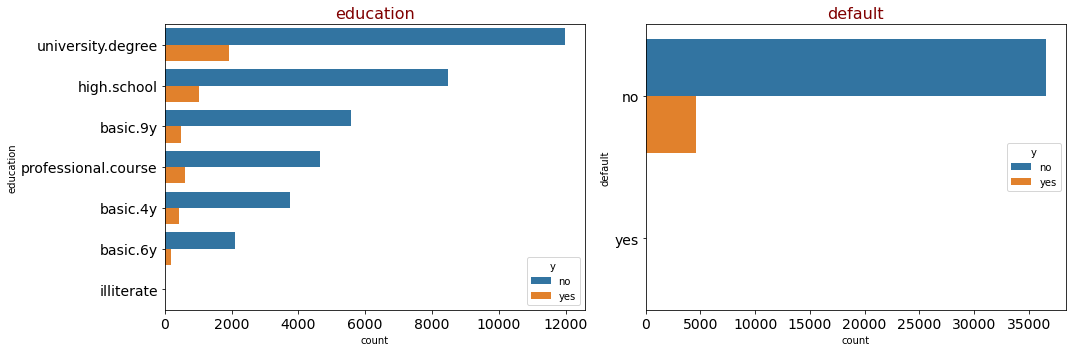

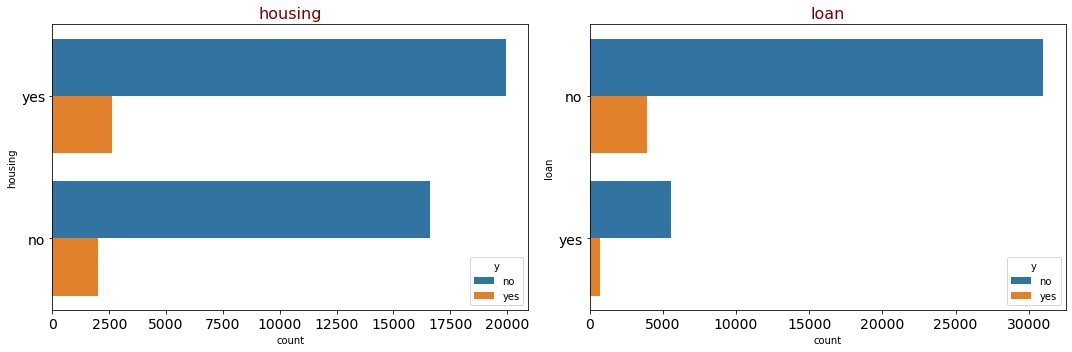

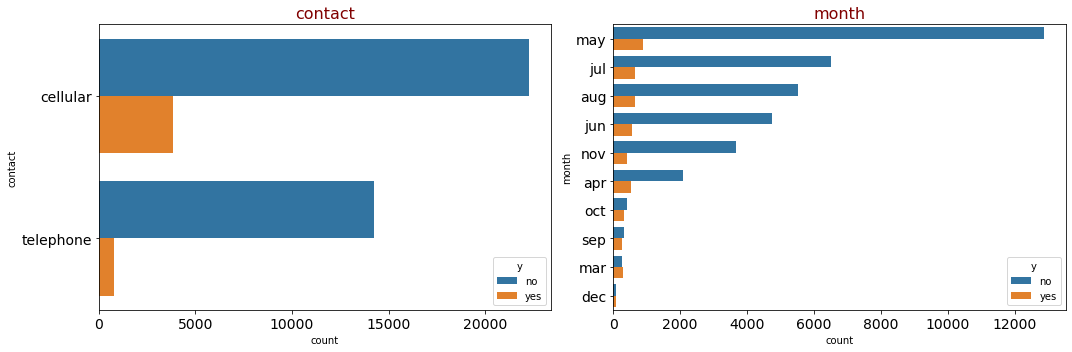

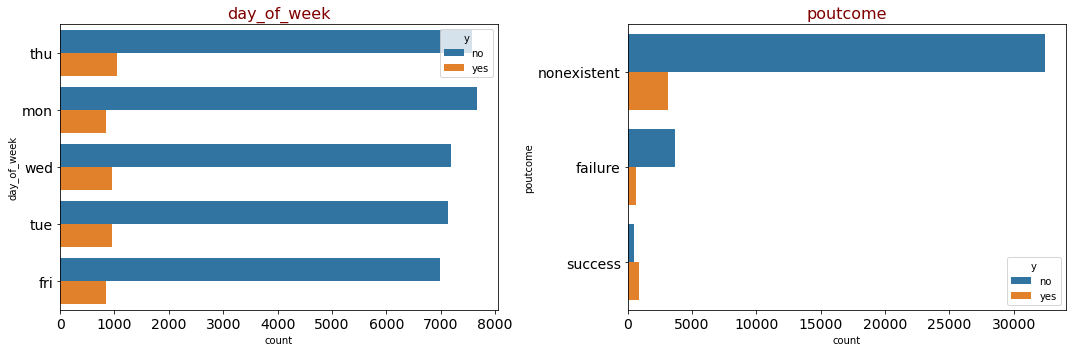

In [14]:
# the code below creates bar plots for the categorical features with respect to the target variable

for i in range(0,len(categorical_col),2):  # looping through steps of 2 to create adjacent plots
    
    if len(categorical_col) > i+1:
        
        plt.figure(figsize=(15,5))
        
        plt.subplot(121)   # first subplot
        sns.countplot(y=data[categorical_col[i]],  # selecting the variable to create the plot
                      hue=data['y'],  # splitting up the data based upon the target variable
                      order = data[categorical_col[i]].value_counts().index,  # displaying the data in descending order
                      data=data)
        
        plt.xticks(size=14)
        plt.yticks(size=14)
        plt.title(categorical_col[i], color='maroon', fontsize=16)  # setting the title
        
        
        plt.subplot(122)  # second subplot          
        sns.countplot(y=data[categorical_col[i+1]],
                      hue=data['y'], 
                      order=data[categorical_col[i+1]].value_counts().index, 
                      data=data)
        
        plt.xticks(size=14)
        plt.yticks(size=14)
        plt.title(categorical_col[i+1], color='maroon', fontsize=16)
        
        plt.tight_layout()
        plt.show()

### Observations:
 The common traits seen for customers who have subscribed for the term deposit are :
- Customers having **administrative jobs** form the majority amongst those who have subscirbed to the term deposit with **technicians** being the second majority.
- Majority of them are **married**.
- Majority of them hold a **university degree or high school degree**.
- They do not hold a credit in default.
- Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to
    it seem to have subscribed to the term deposit.
- Cell-phones should be the preferred mode of contact for contacting customers.

## Analysis of Numerical data

Let's take a look at the distributions of numerical features.

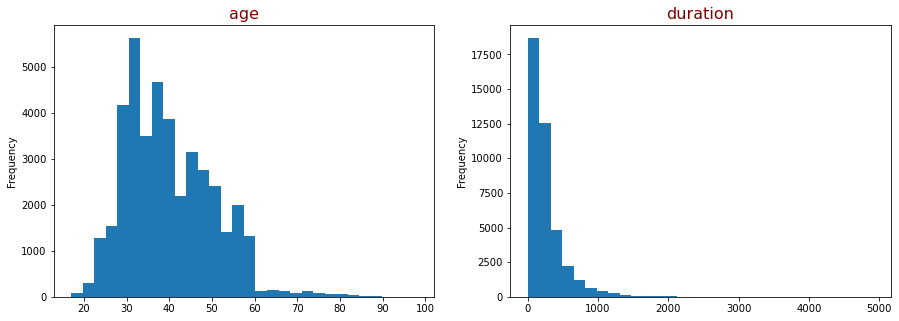

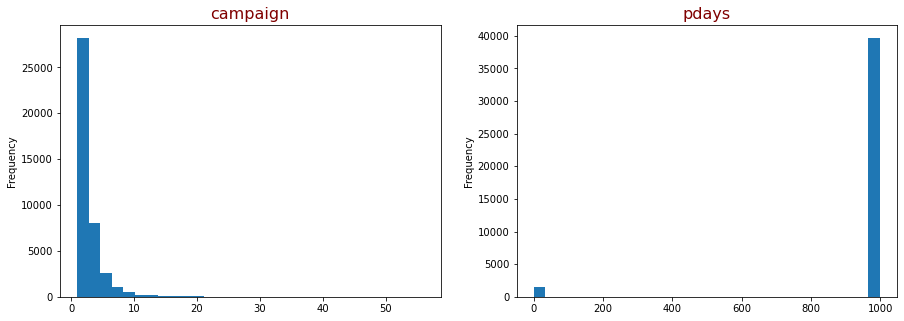

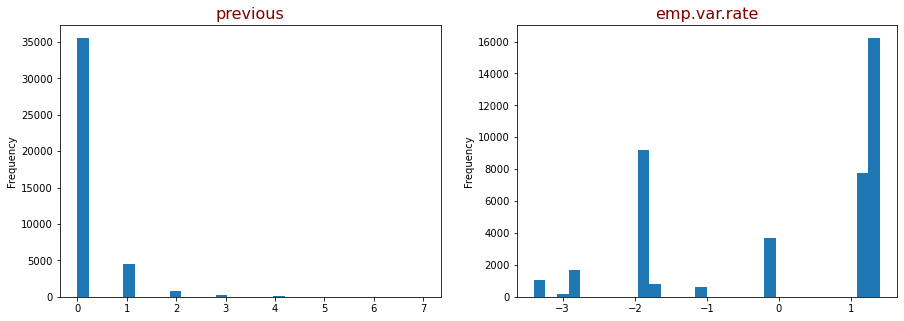

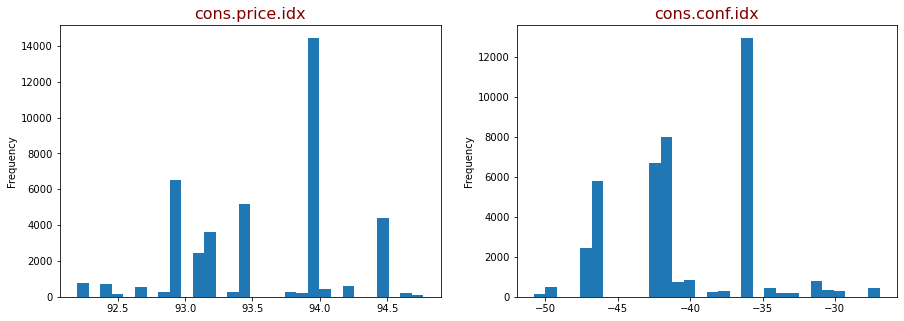

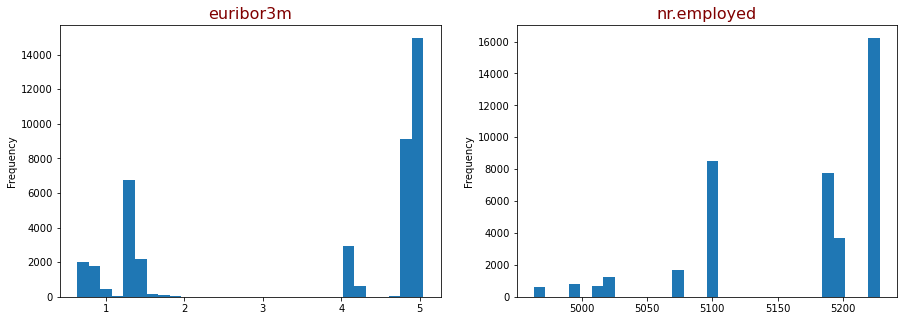

Statistical description of the numerical features:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
# creating histograms for numerical features

for i in range(0,len(numerical_col),2):
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    data[numerical_col[i]].plot.hist(bins=30)
    plt.title(numerical_col[i], color='maroon', fontsize=16)
    
    plt.subplot(122)
    data[numerical_col[i+1]].plot.hist(bins=30)
    plt.title(numerical_col[i+1], color='maroon', fontsize=16)
    
    plt.show()
    
    
print("Statistical description of the numerical features:")
data.describe()

### Observations :

- As we can see from the histogram, the features **age**, **duration** and **campaign** are heavily skewed and this is due to the presence of outliers as seen from the huge difference in the 75th percentile and maximum values of these features in the statistical description. We will deal with these outliers in the further steps.
- Looking at the plot for **pdays** which is skewed towards the value 1000, we can infer that majority of the customers were being contacted for the first time because as per the feature description for **pdays** the value 999 indicates that the customer had not been contacted previously. 
-  The never contacted before respondents skew the variables **campaign** and **previous** towards zero.
- Since the features **pdays** and **previous** consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

### Dropping the columns `pdays` & `previous`

In [16]:
data.drop(['pdays','previous'], axis=1, inplace=True)

# Feature Engineering and Data Preprocessing

In the EDA, we have seen that there are some sparse or similar categories in the categorical features. We will now combine these into a single category. The “enlarged” categories may be somewhat arbitrary, but having less variables will simplify our predictive models and decrease the computation efforts substantially later on.

In [17]:
# creating a copy of the original dataframe
cleaned_data = data.copy()

In [18]:
#JOB
# Combining entrepreneurs and self-employed into self-employed
cleaned_data.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)

# Combining retired and unemployed into no_active_income
cleaned_data.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

# Combining services and housemaid into services
cleaned_data.job.replace(['services', 'housemaid'], 'services', inplace=True)


# MARITAL STATUS
# Combining single and divorced into single
cleaned_data.marital.replace(['single', 'divorced'], 'unmarried', inplace=True)


# EDUCATION
# Combining basic school degrees
cleaned_data.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)


### Treating outliers in the continuous columns

Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
- To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
- To reduce left skewness, we take squares or cubes or higher powers.

But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.

Hence for this data we use a method called **Winsorization**. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.

In [19]:
# the following function will detect the number of outliers in each column of the data set

def detect_outliers(dataframe):
    """This function will detect the outliers present in each column of the dataframe and will return a new dataframe with column name and corresponding number of outliers based on the InterQuartile Range.
    
    Parameters:
    ----------------------
    dataframe : pandas DataFrame object
    
    Returns:
    ----------------------
    dataframe with feature names from original dataframe and number of outliers in each feature
    """
    
    cols = list(dataframe) # A List of all features

    outliers = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to display number of outliers

    for column in cols: # Iterating thorough each feature
        if column in dataframe.select_dtypes(include=np.number).columns: # checking if the feature contains numeric data and only using continuous (numeric) columns

                # first quartile (Q1) 
            q1 = dataframe[column].quantile(0.25) 

                # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)

                # Inter-Quartile Range (IQR)
            iqr = q3 - q1

                # defining range for detecting outliers
            lower_fence = q1 - (1.5*iqr)
            upper_fence = q3 + (1.5*iqr)

               # the below code detects which data points lie outside of 1.5 times of the calculated InterQuartile range 
               # and counts them and adds the number to the outlier dataframe along with the corresponding feature name
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < lower_fence) | 
                                                                                            (dataframe[column] > upper_fence)].shape[0]},ignore_index=True)
    return outliers

In [20]:
detect_outliers(cleaned_data)

,Feature,Number of Outliers
0,age,468
1,duration,2963
2,campaign,2406
3,emp.var.rate,0
4,cons.price.idx,0
5,cons.conf.idx,446
6,euribor3m,0
7,nr.employed,0


The age, duration, campaign and cons.conf.idx features contain large number of outliers. We will correct these using winsorization method.

In [21]:
# the following code treats outliers 

for col in cleaned_data.columns.to_list():
    if col in cleaned_data.select_dtypes(include=np.number).columns:
        cleaned_data[col] = winsorize(cleaned_data[col], limits=[0.05, 0.1],inclusive=(True, True))

Let's check if all outliers have been treated.

In [22]:
detect_outliers(cleaned_data)

,Feature,Number of Outliers
0,age,0
1,duration,0
2,campaign,0
3,emp.var.rate,0
4,cons.price.idx,0
5,cons.conf.idx,0
6,euribor3m,0
7,nr.employed,0


Clearly all outliers have been treated from all the continous columns.

## Checking for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of **80:20 or greater** is typically considered as an imbalance for a binary classification. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 

The code below that takes the target variable and outputs the distribution of classes in the target.

In [23]:
# obtaining the relative frequencies of the two categories in the target variable
class_values = (data['y'].value_counts()/data['y'].count())*100
print(class_values)

no     88.733728
yes    11.266272
Name: y, dtype: float64


#### Observations : 
- The class distribution in the target is ~89:11. This is a clear indication of imbalance.

## Label encoding
We'll now perform label encoding on categorical features of our dataset. inclduing the target variable, so that we can feed them to the machine learning algorithms.

In [24]:
#categorical features of our dataset
cleaned_data[categorical_col]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,services,married,basic_school,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic_school,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,no_active_income,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,no_active_income,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [25]:
#performing label encoding
le = LabelEncoder()

for feature in categorical_col:
    try:
        cleaned_data[feature] = le.fit_transform(cleaned_data[feature])
    except:
        print('Error encoding '+feature)

Taking a look at the final cleaned dataset:

In [26]:
cleaned_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,55,5,0,0,0,0,0,1,6,1,261,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,55,5,0,1,0,0,0,1,6,1,149,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,5,0,1,0,1,0,1,6,1,226,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,0,0,0,0,1,6,1,151,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,55,5,0,1,0,0,1,1,6,1,307,1,1,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  poutcome        41176 non-null  int32  
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null 

Our dataset is now ready to be fed into our machine learning algorithms for prediction.

## Fit vanilla classification models

Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms. 

Some of the main classification algorithms that we will use-
- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier
- XGBClassifier
- GradientBoostingClassifier

The code we have written below takes the features, target and the classification model as the input parameters and splits them into training data and testing data. It then fits the classification model on the train data and then makes a prediction on the test data and outputs the `roc_auc_score` and the `roc_curve` for this prediction, for each model.


LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9094
           1       0.60      0.34      0.44      1200

    accuracy                           0.90     10294
   macro avg       0.76      0.66      0.69     10294
weighted avg       0.88      0.90      0.88     10294

ROC_AUC_SCORE for Logistic Regression is 0.655319991202991


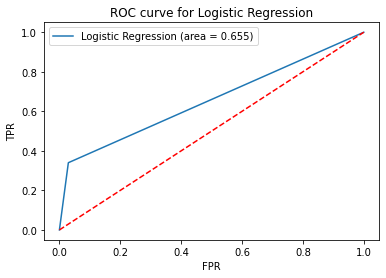

DECISION TREE

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9094
           1       0.50      0.51      0.50      1200

    accuracy                           0.88     10294
   macro avg       0.72      0.72      0.72     10294
weighted avg       0.88      0.88      0.88     10294

ROC_AUC_SCORE for Decision Tree is 0.720266384429294


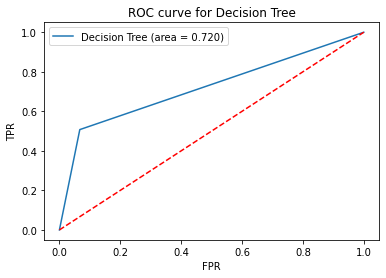

RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.65      0.47      0.55      1200

    accuracy                           0.91     10294
   macro avg       0.79      0.72      0.75     10294
weighted avg       0.90      0.91      0.90     10294

ROC_AUC_SCORE for Random Forest is 0.7205339601202256


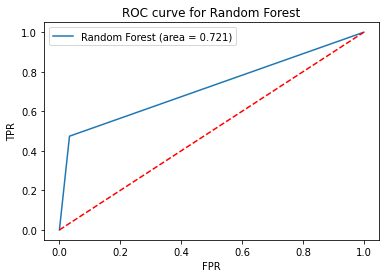

XGBOOST

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9094
           1       0.62      0.48      0.54      1200

    accuracy                           0.90     10294
   macro avg       0.77      0.72      0.74     10294
weighted avg       0.90      0.90      0.90     10294

ROC_AUC_SCORE for XGBoost is 0.7225417857928303


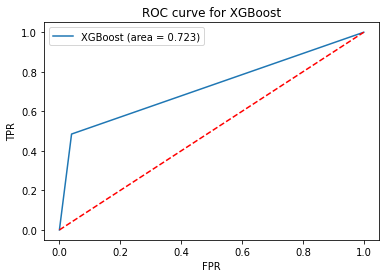

GRADIENT BOOSTING

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.69      0.43      0.53      1200

    accuracy                           0.91     10294
   macro avg       0.81      0.70      0.74     10294
weighted avg       0.90      0.91      0.90     10294

ROC_AUC_SCORE for Gradient Boosting is 0.7038010409794003


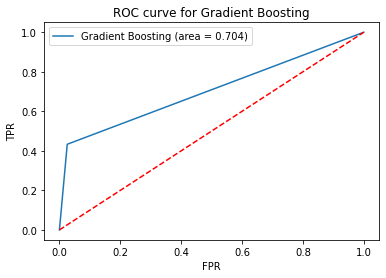

In [28]:
# Predictors
X = cleaned_data.drop('y', axis=1)

# Target
y = cleaned_data['y']


X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Choosing the models
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,
          'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    print(i[0].upper())
    print()
    
    model = i[1]()

    model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    
    auc = roc_auc_score(y_test, y_predicted)
    
    print('Classification Report:')
    print(classification_report(y_test,y_predicted))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
    print('ROC_AUC_SCORE for '+i[0]+' is',roc_auc_score(y_test, y_predicted))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate, label= i[0]+' (area = %0.03f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc="upper left")
    plt.title('ROC curve for '+i[0])
    plt.show()
    print("="*60)

## Feature Selection 

Now that we have applied vanilla models on our data, we now have a basic understanding of what our predictions look like. Let's now use feature selection methods for identifying the best set of features for each model.

#### Using RFE for feature selection
Let's use Recursive Feature Elimination (RFE) for selecting the best features. RFE is a wrapper method that uses the model to identify the best features. 

In [29]:
# Choosing the models. 
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,
          'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

# Selecting 8 number of features
for i in models.items():
#   selecting models
    models = i[1]()
#   using rfe and selecting 8 features
    rfe = RFE(models,8)
#   fitting the model
    rfe = rfe.fit(X,y)
#   ranking features
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)



Features  to be selected for Logistic Regression are:
['marital', 'housing', 'contact', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m']
Features  to be selected for Decision Tree are:
['age', 'job', 'education', 'day_of_week', 'duration', 'campaign', 'euribor3m', 'nr.employed']
Features  to be selected for Random Forest are:
['age', 'job', 'day_of_week', 'duration', 'campaign', 'poutcome', 'euribor3m', 'nr.employed']
Features  to be selected for XGBoost are:
['month', 'duration', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Features  to be selected for Gradient Boosting are:
['contact', 'month', 'duration', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Let’s refit our model to only these features to see how it changes the quality of the prediction:

In [30]:
# Predictors
X = cleaned_data[['marital', 'housing', 'contact', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m']]

# Target
y = cleaned_data['y']

X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print("LOGISTIC REGRESSION AFTER FEATURE SELECTION: \n")

model = LogisticRegression()
model.fit(X_train, y_train)
    
y_predicted = model.predict(X_test)
auc = roc_auc_score(y_test, y_predicted)
    
print('Classification Report:')
print(classification_report(y_test,y_predicted))
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
print('ROC_AUC_SCORE for Logistic Regression'+' is',roc_auc_score(y_test, y_predicted))
    
    

LOGISTIC REGRESSION AFTER FEATURE SELECTION: 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9094
           1       0.71      0.15      0.25      1200

    accuracy                           0.89     10294
   macro avg       0.81      0.57      0.60     10294
weighted avg       0.88      0.89      0.86     10294

ROC_AUC_SCORE for Logistic Regression is 0.5729597353566455


In [31]:
# Predictors
X = cleaned_data[['age', 'job', 'education', 'day_of_week', 'duration', 'campaign', 'euribor3m', 'nr.employed']]

# Target
y = cleaned_data['y']


X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print("DECISION TREE CLASSIFIER AFTER FEATURE SELECTION: \n")

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_predicted = model.predict(X_test)
auc = roc_auc_score(y_test, y_predicted)
    
print('Classification Report:')
print(classification_report(y_test,y_predicted))
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
print('ROC_AUC_SCORE for Decision Tree'+' is',roc_auc_score(y_test, y_predicted))
    

DECISION TREE CLASSIFIER AFTER FEATURE SELECTION: 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9094
           1       0.49      0.50      0.49      1200

    accuracy                           0.88     10294
   macro avg       0.71      0.72      0.71     10294
weighted avg       0.88      0.88      0.88     10294

ROC_AUC_SCORE for Decision Tree is 0.7152518143831098


In [32]:
# Predictors
X = cleaned_data[['age', 'job', 'day_of_week', 'duration', 'campaign', 'poutcome', 'euribor3m', 'nr.employed']]

# Target
y = cleaned_data['y']


X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print("RANDOM FOREST CLASSIFIER AFTER FEATURE SELECTION: \n")

model = RandomForestClassifier()
model.fit(X_train, y_train)
    
y_predicted = model.predict(X_test)
auc = roc_auc_score(y_test, y_predicted)
    
print('Classification Report:')
print(classification_report(y_test,y_predicted))
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
print('ROC_AUC_SCORE for Random Forest'+' is',roc_auc_score(y_test, y_predicted))
    

RANDOM FOREST CLASSIFIER AFTER FEATURE SELECTION: 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      9094
           1       0.62      0.48      0.54      1200

    accuracy                           0.91     10294
   macro avg       0.78      0.72      0.74     10294
weighted avg       0.90      0.91      0.90     10294

ROC_AUC_SCORE for Random Forest is 0.719923209442123


In [33]:
# Predictors
X = cleaned_data[['month', 'duration', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Target
y = cleaned_data['y']


X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print("XGBCLASSIFIER AFTER FEATURE SELECTION: \n")

model = XGBClassifier()
model.fit(X_train, y_train)
    
y_predicted = model.predict(X_test)
auc = roc_auc_score(y_test, y_predicted)
    
print('Classification Report:')
print(classification_report(y_test,y_predicted))
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
print('ROC_AUC_SCORE for XGBOOST'+' is',roc_auc_score(y_test, y_predicted))
    

XGBCLASSIFIER AFTER FEATURE SELECTION: 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.64      0.47      0.54      1200

    accuracy                           0.91     10294
   macro avg       0.79      0.72      0.75     10294
weighted avg       0.90      0.91      0.90     10294

ROC_AUC_SCORE for XGBOOST is 0.717900813723334


In [34]:
# Predictors
X = cleaned_data[['contact', 'month', 'duration', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Target
y = cleaned_data['y']


X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

print("GRADIENT BOOSTING CLASSIFIER AFTER FEATURE SELECTION: \n")

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
    
y_predicted = model.predict(X_test)
auc = roc_auc_score(y_test, y_predicted)
    
print('Classification Report:')
print(classification_report(y_test,y_predicted))
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted)
print('ROC_AUC_SCORE for Gradient boosting is',roc_auc_score(y_test, y_predicted))
    

GRADIENT BOOSTING CLASSIFIER AFTER FEATURE SELECTION: 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.69      0.45      0.55      1200

    accuracy                           0.91     10294
   macro avg       0.81      0.71      0.75     10294
weighted avg       0.90      0.91      0.90     10294

ROC_AUC_SCORE for Gradient boosting is 0.7137228758888644


**The feature selection technique didnot improve the performance of the models. Let's try to do some hyperparameter tuning to improve the models, moving forward with only the models that have a good ROC_AUC_SCORE.**

# Grid-Search & Hyperparameter Tuning 

Hyperparameters are function attributes that we have to specify for an algorithm. By now, you should be knowing that grid search is done to find out the best set of hyperparameters for your model.  


### Grid Search for Random Forest


In [35]:
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters for Random Forest are:',grid_search_model.best_params_)

Best Parameters for Random Forest are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply **Synthetic Minority Oversampling Technique (SMOTE)** for undersampling and oversampling the majority and minority classes in the target respectively. 

### Applying Random Forest model with Best paramaters and SMOTE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     10929
           1       0.42      0.89      0.57      1424

    accuracy                           0.84     12353
   macro avg       0.70      0.86      0.74     12353
weighted avg       0.92      0.84      0.87     12353

Confusion Matrix:
Predicted     0     1    All
True                        
0          9151  1778  10929
1           158  1266   1424
All        9309  3044  12353


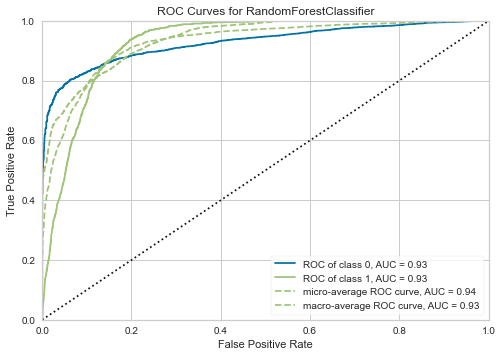

ROC_AUC_SCORE 0.863179256611366


In [44]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_test,y_train,y_test = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance. smote uses exiting data and averages to add more data
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='log2', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_test)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_test,y_test)
    print('ROC_AUC_SCORE', roc_auc_score(y_test, y_pred))


grid_search_random_forrest_best(X,y)

### Applying the grid search function for random forest only on the best features obtained using RFE

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     10929
           1       0.42      0.88      0.57      1424

    accuracy                           0.85     12353
   macro avg       0.70      0.86      0.74     12353
weighted avg       0.92      0.85      0.87     12353

Confusion Matrix:
Predicted     0     1    All
True                        
0          9213  1716  10929
1           174  1250   1424
All        9387  2966  12353


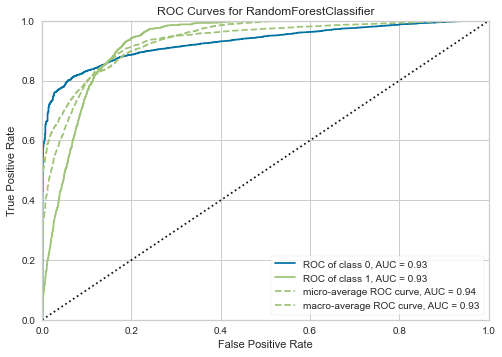

ROC_AUC_SCORE 0.8603977691555607


In [45]:
X = cleaned_data[['age', 'job', 'day_of_week', 'duration', 'campaign', 'poutcome', 'euribor3m', 'nr.employed']]
y = cleaned_data['y']
grid_search_random_forrest_best(X,y)

### Using Grid Search for Logistic Regression with SMOTE

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     10929
           1       0.38      0.88      0.53      1424

    accuracy                           0.82     12353
   macro avg       0.68      0.85      0.71     12353
weighted avg       0.91      0.82      0.85     12353

CONFUSION MATRIX:
Predicted     0     1    All
True                        
0          8865  2064  10929
1           172  1252   1424
All        9037  3316  12353


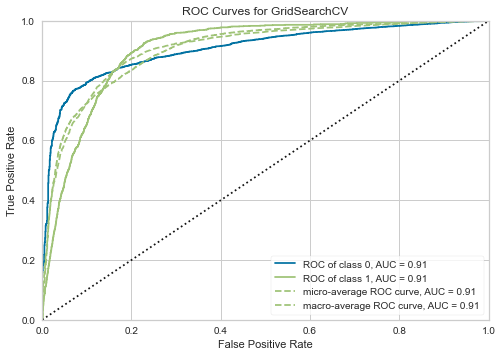

ROC_AUC_SCORE for Logistic Regression with grid search and SMOTE:  0.8451790720698771


In [49]:
# Predictors
X = cleaned_data.drop('y', axis=1)
# Target
y = cleaned_data['y']
# splitting the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initializing smote
smote = SMOTE()
# applying smote
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# fitting logistic regression
log_reg = LogisticRegression()
# parameter grid
param_grid = { 
        'C' : np.logspace(-5, 8, 15)
            }
# initializing grid search model
grid_search = GridSearchCV(log_reg, param_grid=param_grid)
# Fitting the model 
grid_search.fit(X_sm, y_sm)
# predicting testues
y_pred = grid_search.predict(x_test)
# printing classification report
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, y_pred))
# print confusion matrix
print('CONFUSION MATRIX:')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
# using visualizer
visualizer = roc_auc(grid_search,X_sm,y_sm,x_test,y_test)
# auc
print('ROC_AUC_SCORE for Logistic Regression with grid search and SMOTE: ', roc_auc_score(y_test, y_pred))

### Applying XGBoost model with SMOTE

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     10929
           1       0.46      0.87      0.60      1424

    accuracy                           0.87     12353
   macro avg       0.72      0.87      0.76     12353
weighted avg       0.92      0.87      0.88     12353

Predicted     0     1    All
True                        
0          9482  1447  10929
1           184  1240   1424
All        9666  2687  12353


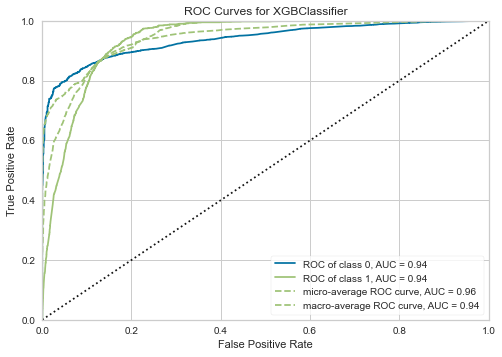

ROC_AUC_SCORE for XGB Classifier with selected features and SMOTE:  0.8691932401270304


In [51]:
# Predictor with selected features
X = cleaned_data[['contact', 'month', 'duration', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
# Target
y = cleaned_data['y']
# spiltting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# initializing smote
smote = SMOTE()
# applying smote
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# initializing XGBoost classifier
model_xgb = XGBClassifier(n_estimators=50, max_depth=4)
# fitting the model_xgb
model_xgb.fit(pd.DataFrame(X_sm,columns=x_train.columns), y_sm)
# predicting the model_xgb
y_pred = model_xgb.predict(x_test)
# printing classification report
print(classification_report(y_test, y_pred))
# printing confusion matrix
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
# using visualizer to 
visualizer = roc_auc(model_xgb,X_sm,y_sm,x_test,y_test)
# auc
print('ROC_AUC_SCORE for XGB Classifier with selected features and SMOTE: ', roc_auc_score(y_test, y_pred))

### CONCLUSION

- The XGB Classifier model gives best ROC_AUC score which is 0.87 and a recall of 0.87 as well when used with SMOTE and best features found with RFE.
- Best features identified for XGB Classifier using RFE are: ['contact', 'month', 'duration', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']